In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)

In [68]:
import matplotlib.pyplot as plt

In [66]:
import seaborn as sn

In [4]:
from datetime import datetime as dt
from datetime import timedelta as td

In [2]:
train_policy = pd.read_csv('datastorm_policy_data.csv',low_memory=False)
train_agent = pd.read_csv('datastorm_agent_data.csv',low_memory=False)

In [99]:
test = pd.read_csv('testset.csv')
test1 = pd.read_csv(r"C:\Users\user\Downloads\Sew.csv")

In [111]:
test1['map client cd']

0        C149441
1        C106243
2        C100273
3        C152291
4        C149415
          ...   
35818    C105128
35819    C109357
35820    C154219
35821    C116276
35822    C100492
Name: map client cd, Length: 35823, dtype: object

In [108]:
test.map_client_cd

0        C100003
1        C100004
2        C100009
3        C100014
4        C100015
          ...   
19137    C154448
19138    C154449
19139    C154450
19140    C154454
19141    C154455
Name: map_client_cd, Length: 19142, dtype: object

In [119]:
#tt = test1.merge(test,left_on='map client cd',right_on='map_client_cd',how='right')
tt = tt.rename(columns={'probability of cross sell':'probability_of_cross_sell'})

In [120]:
tt

,map client cd,probability_of_cross_sell,map_client_cd
0,C149441,0.987965,C149441
1,C106243,0.988078,C106243
2,C106243,0.991280,C106243
3,C100273,0.978145,C100273
4,C152291,0.995373,C152291
...,...,...,...
24008,NaN,NaN,C149853
24009,NaN,NaN,C149862
24010,NaN,NaN,C150590
24011,NaN,NaN,C151964


In [121]:
tt[['map_client_cd','probability_of_cross_sell']].to_csv('test_resuts.csv',header=True,index=False)

In [81]:
ww = pd.read_csv('hh1.csv',low_memory=False)

In [82]:
ww

,index,policy_snapshot_as_on,client_code,product_code,no_product_code
0,7489,20181231,C108468,1,0
1,27039,20190131,C108468,1,0
2,46790,20190228,C108468,1,0
3,65814,20190331,C108468,1,0
4,85074,20190430,C108468,1,0
...,...,...,...,...,...
383498,318412,20200301,C119655,1,0
383499,339482,20200401,C119655,1,0
383500,357965,20200501,C119655,1,0
383501,375783,20200601,C119655,1,0


In [17]:
#pre processing
'''
G = {'F':1,'M':0}
train_policy = train_policy.replace({"main_holder_gender": G})

train_policy = pd.concat([train_policy,pd.get_dummies(train_policy.policy_payment_mode,prefix='Pay_mode_')],axis=1)

train_policy = pd.concat([train_policy,pd.get_dummies(train_policy.policy_status,prefix='status_')],axis=1)
'''
train_policy["comm_Year"] = train_policy["commencement_dt"].apply(lambda x: dt.strptime(str(x), '%Y/%m/%d').year)
train_policy["comm_month"] = train_policy["commencement_dt"].apply(lambda x: dt.strptime(str(x), '%Y/%m/%d').month)


S = {'Y':1,'N':0}
train_policy = train_policy.replace({"main_holder_smoker_flag": S})

rider_prem=[f"rider{i}_prem"for i in range(1,11)]
rider=[f"rider{i}"for i in range(1,11)]
for i in range(10):
    train_policy[rider[i]]=train_policy[rider_prem[i]].apply(lambda x: 1 if x!=0 else 0)
    
P = {'CASH':1,'CHEQUE':0}
train_policy = train_policy.replace({"payment_method": P})

train_policy = pd.concat([train_policy,pd.get_dummies(train_policy.product_name,prefix='product_')],axis=1)

In [14]:
train_policy["holder_dob"] = train_policy["main_holder_dob"].apply(lambda x: dt.strptime(str(x), '%Y/%m/%d').year)
train_policy["snapshot"] = train_policy["policy_snapshot_as_on"].apply(lambda x: dt.strptime(str(x), '%Y%m%d').year)
train_policy['client_age'] = train_policy["snapshot"] - train_policy["holder_dob"]



In [52]:
tt=list(train_policy.iloc[:,59:].columns)
mm = ["main_holder_occupation_cd",'policy_term',"main_holder_smoker_flag","main_holder_gender",'total_sum_assuared','premium_value','policy_snapshot_as_on','client_code',"no_clients_agent_x",'no_clients_cluster','status']
tt_mm = tt+mm
train = xx[tt_mm]

In [83]:
qqw =train.merge(ww,left_on=['policy_snapshot_as_on',"client_code"],right_on=['policy_snapshot_as_on',"client_code"],how='left')

In [84]:
qqw = qqw.drop(columns=['index','product_code'])
qqw = qqw.rename(columns={"no_product_code":'cross_seller'})

In [85]:
train_qqw=qqw[qqw.policy_snapshot_as_on<=20200101]
train_qqw = train_qqw.drop(columns=['client_code','status'])
train_qqw

,client_age,Pay_mode__H,Pay_mode__M,Pay_mode__Q,Pay_mode__S,Pay_mode__Y,status__INFORCE,status__LAPSED,status__TERMINATED,comm_Year,comm_month,rider1,rider2,rider3,rider4,rider5,rider6,rider7,rider8,rider9,rider10,product__EDUCATION,product__HEALTH,product__INVESTMENT,product__PROTECTION,product__RETIREMENT,main_holder_occupation_cd,policy_term,main_holder_smoker_flag,main_holder_gender,total_sum_assuared,premium_value,policy_snapshot_as_on,no_clients_agent_x,no_clients_cluster,cross_seller
0,36,0,1,0,0,0,1,0,0,2011,8,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,249.0,20,0,0,310000.0,16824.0,20190131,10,10937,0.0
1,61,0,1,0,0,0,1,0,0,2006,7,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,165.0,15,0,1,1000000.0,103044.0,20190901,45,12270,0.0
2,52,0,0,0,0,1,1,0,0,2018,12,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,330.0,20,0,0,500000.0,100050.0,20191101,35,3370,0.0
3,30,0,0,1,0,0,1,0,0,2018,11,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,415.0,15,0,0,250000.0,33204.0,20191201,17,10937,0.0
4,31,0,1,0,0,0,0,1,0,2012,4,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,165.0,15,0,0,205000.0,14844.0,20190228,18,10937,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631409,42,0,1,0,0,0,0,1,0,2015,9,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,329.0,30,0,0,1100000.0,240324.0,20190531,11,12270,NaN
631410,49,0,1,0,0,0,1,0,0,2009,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,245.0,20,0,0,200000.0,10884.0,20190630,44,10937,0.0
631411,58,0,1,0,0,0,1,0,0,2014,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,392.0,15,0,1,120000.0,13044.0,20181231,13,10937,0.0
631412,47,0,1,0,0,0,1,0,0,2015,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,165.0,25,0,0,300000.0,65604.0,20181231,45,12270,0.0


In [92]:
train_qqw = train_qqw.dropna(subset=["cross_seller"])

In [94]:
y = train_qqw.iloc[:,35].values

In [97]:
np.isnan(y)

array([False, False, False, ..., False, False, False])

In [87]:
#qqw = qqw.drop(columns=['client_code'])
#train_qqw=qqw[qqw.policy_snapshot_as_on<=20200101]
test_qqw=qqw[qqw.policy_snapshot_as_on==20200701]
test_qqw = test_qqw.drop(columns=['cross_seller','status'])
test_qqw
["product__EDUCATION","product__HEALTH",'product__INVESTMENT','product__PROTECTION','product__RETIREMENT','cross_seller']

,client_age,Pay_mode__H,Pay_mode__M,Pay_mode__Q,Pay_mode__S,Pay_mode__Y,status__INFORCE,status__LAPSED,status__TERMINATED,comm_Year,comm_month,rider1,rider2,rider3,rider4,rider5,rider6,rider7,rider8,rider9,rider10,product__EDUCATION,product__HEALTH,product__INVESTMENT,product__PROTECTION,product__RETIREMENT,main_holder_occupation_cd,policy_term,main_holder_smoker_flag,main_holder_gender,total_sum_assuared,premium_value,policy_snapshot_as_on,client_code,no_clients_agent_x,no_clients_cluster
1079,42,0,1,0,0,0,1,0,0,2019,9,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,363.0,15,0,1,350000.0,76524.0,20200701,C149441,17,10937
1080,44,0,1,0,0,0,1,0,0,2014,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,450.0,15,0,0,250000.0,18084.0,20200701,C106243,26,10937
1081,36,0,0,0,0,1,1,0,0,2019,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,158.0,20,0,0,2500000.0,500050.0,20200701,C100273,8,12270
1082,62,0,0,1,0,0,1,0,0,2020,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,360.0,10,0,1,275000.0,59036.0,20200701,C152291,5,12270
1083,30,0,1,0,0,0,0,1,0,2019,9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,321.0,26,1,0,1000000.0,67584.0,20200701,C149415,14,12270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631311,35,0,1,0,0,0,0,1,0,2008,10,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,274.0,20,0,0,350000.0,18984.0,20200701,C105128,45,12270
631312,58,0,1,0,0,0,1,0,0,2012,8,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,450.0,20,0,1,250000.0,15084.0,20200701,C109357,5,10937
631313,29,0,1,0,0,0,1,0,0,2020,5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,330.0,30,0,1,800000.0,43284.0,20200701,C154219,8,12270
631314,45,0,1,0,0,0,0,1,0,2016,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,354.0,15,0,0,416000.0,30036.0,20200701,C116276,13,10937


In [88]:
test_qqw.to_csv('test_qqw.csv',header=True,index=False)

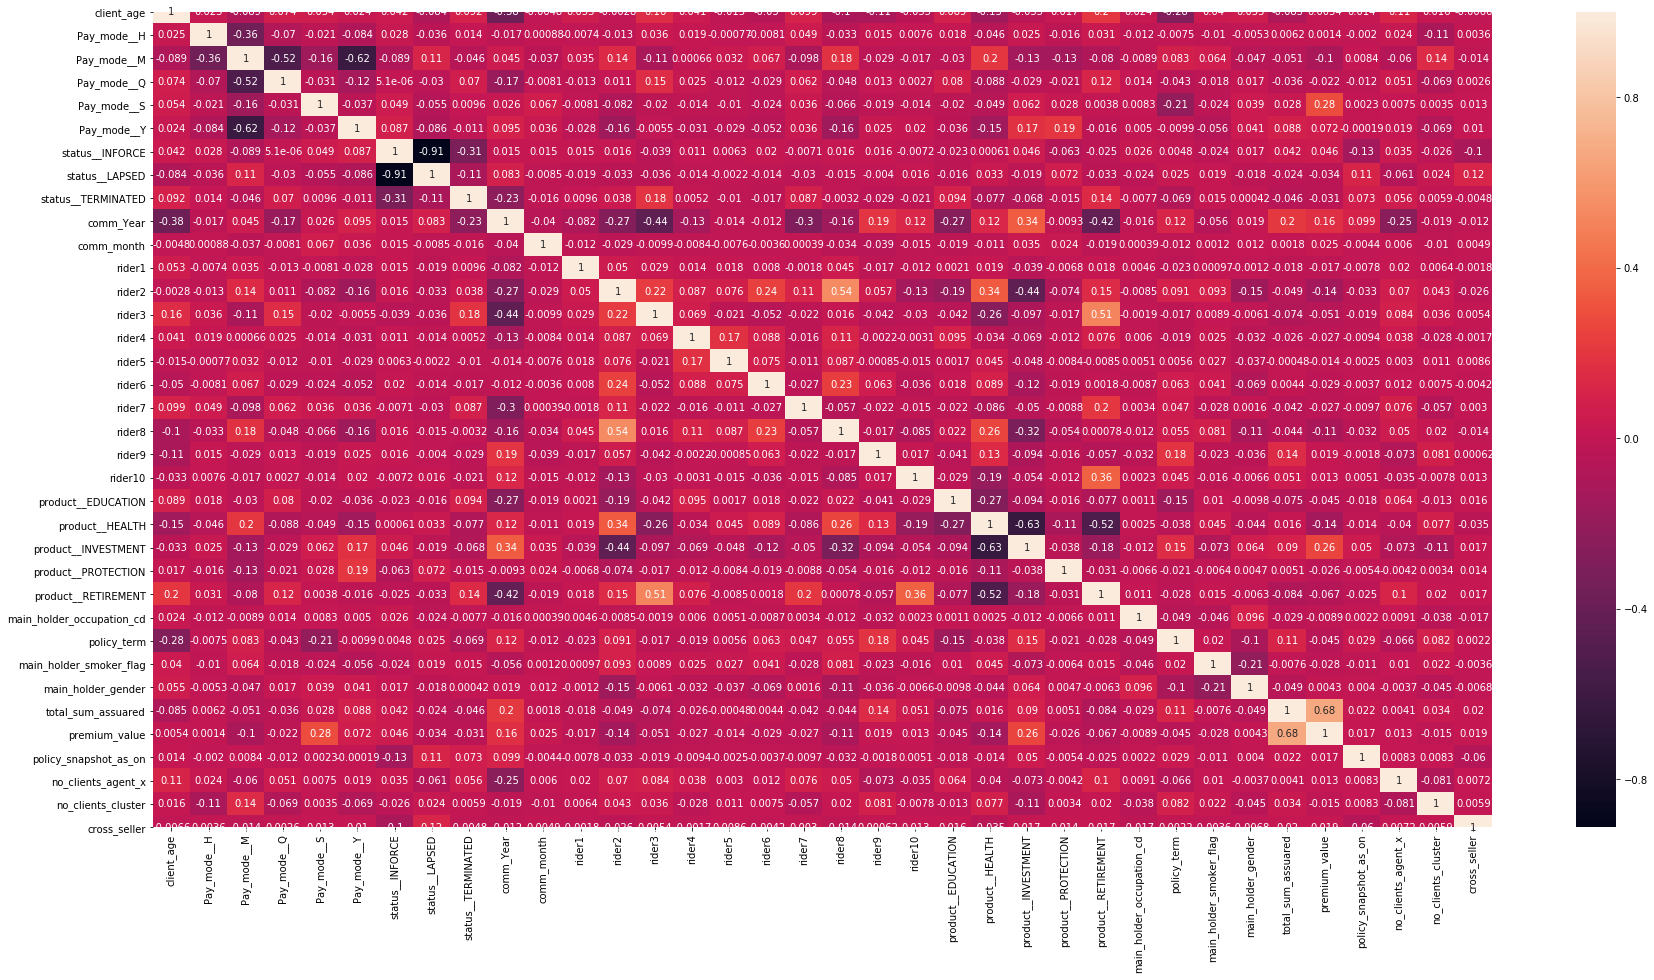

In [89]:
fig_dims = (30, 15)
fig, ax = plt.subplots(figsize=fig_dims)
corrMatrix = qqw.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [90]:
corrMatrix.cross_seller.sort_values()

status__INFORCE             -0.102659
policy_snapshot_as_on       -0.060035
product__HEALTH             -0.034753
rider2                      -0.026405
main_holder_occupation_cd   -0.016547
Pay_mode__M                 -0.014328
rider8                      -0.014046
comm_Year                   -0.011692
main_holder_gender          -0.006833
client_age                  -0.006618
status__TERMINATED          -0.004767
rider6                      -0.004169
main_holder_smoker_flag     -0.003641
rider1                      -0.001778
rider4                      -0.001721
rider9                       0.000618
policy_term                  0.002235
Pay_mode__Q                  0.002582
rider7                       0.002951
Pay_mode__H                  0.003583
comm_month                   0.004906
rider3                       0.005443
no_clients_cluster           0.005923
no_clients_agent_x           0.007220
rider5                       0.008595
Pay_mode__Y                  0.010227
rider10     

In [51]:
#train_agent=train_agent.dropna(subset=['agent_code'])
#xx = train_policy.merge(train_agent,left_on='agent_code',right_on='agent_code',how='left')
#cluster = xx.groupby(['cluster_code'])[['client_code']].nunique().reset_index()
#agent = xx.groupby(['agent_code'])[['client_code']].nunique().reset_index()
#agent = agent.rename(columns={'client_code':'no_clients_agent'})
#cluster = cluster.rename(columns={'client_code':'no_clients_cluster'})
#xx = xx.merge(agent,left_on='agent_code',right_on='agent_code',how='left')
#xx = xx.merge(cluster,left_on='cluster_code',right_on='cluster_code',how='left')

info = {'TERMINATED':0,'INFORCED':1}
xx = xx.replace({"status": info})

In [41]:
cluster

,cluster_code,no_clients_cluster
0,LA01001,12270
1,LA01002,10937
2,LA01003,188
3,LA01004,3370
4,LA01005,10
5,LA01006,3232


In [37]:
train_agent

,agent_level,title,dob,gender,marital_status,date_joined,status,substatus,termination_date,city_name,cluster_code,agent_code,supervisor_code,zone_code,region_code,designation
1,L2,Mr.,1957/12/01,Male,NaN,1999/05/24,INFORCED,ACTIVE,NaN,Ihala Beligalla,LA01001,AG102051,AG108546,ZONE103,RA267,Advisor
2,L2,Mr.,1973/09/01,Male,NaN,2008/05/27,TERMINATED,AUTOTERMINATED,2018/11/01,Alubomulla,LA01001,AG101552,AG102801,ZONE104,RA263,Advisor
3,L2,Mr.,1994/08/01,Male,NaN,2014/06/10,TERMINATED,AUTOTERMINATED,2019/07/19,Kekanadurra,LA01002,AG108852,AG106704,ZONE111,RA217,Advisor
4,L6,Mr.,1981/08/01,Male,NaN,2004/04/21,INFORCED,ACTIVE,NaN,Kolambageara,LA01002,AG106107,AG101697,ZONE105,RA220,Regional Manager
5,L2,Mr.,1981/04/01,Male,NaN,2002/11/25,INFORCED,ACTIVE,NaN,Balangoda,LA01002,AG108563,AG104551,ZONE114,RA270,Advisor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14967,L3,Mr.,1995/08/01,Male,Single,2019/10/25,TERMINATED,RESIGNED APPROVED,2020/09/07,Anuradhapura,LA01006,AG108109,AG101697,ZONE102,RA256,Team Leader
14968,L3,Mr.,1976/04/01,Male,NaN,2019/11/27,TERMINATED,RESIGNED UNAPPROVED,2020/03/12,Battaramulla,LA01001,AG107144,AG101209,ZONE108,RA276,Team Leader
14969,L2,Mr.,2000/11/01,Male,Single,2020/02/25,TERMINATED,RESIGNED UNAPPROVED,2020/09/16,Eheliyagoda,LA01002,AG104852,AG103614,ZONE114,RA261,Advisor
14970,L2,Ms.,1999/09/01,Female,Single,2020/03/06,TERMINATED,RESIGNED APPROVED,2021/03/18,Madampe,LA01001,AG103935,AG102730,ZONE106,RA286,Advisor


In [ ]:
# calculation of prediction target

no_product_code=train_policy[train_policy.status__INFORCE==1].groupby(["policy_snapshot_as_on","client_code"]
no_product_code['no_product_code'] = 0                                                                      
customer = list(set(no_product_code.client_code.unique()))
n = len(customer)
new_dataset = pd.DataFrame()
for i in range(n):
    print(f"{i}/{n}",end = "\r")
    hh = no_product_code[no_product_code.client_code==customer[i]].sort_values(by = ["policy_snapshot_as_on"]).reset_index()
    #hh = no_product_code[no_product_code.client_code=="C100000"].sort_values(by = ["policy_snapshot_as_on"]).reset_index()

    pp = list(hh.product_code)
    kk=[]
    if len(pp)>=6:
        for i in range(len(pp)-5):
            list_a = pp[i:i+6]
            if list_a[0]<max(list_a):
                kk.append(1)
            else:
                kk.append(0)
        hh.no_product_code[0:-5] = kk
    else:
        continue
    
    new_dataset=pd.concat([new_dataset,hh])
 
 new_dataset.to_csv('hh1.csv',header=True,index=False)                                                                     